In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data")

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# X_train=mnist.train.images.reshape((-1, n_steps, n_inputs))
X_train=mnist.train.images
Y_train=mnist.train.labels

# X_test=mnist.test.images.reshape((-1, n_steps, n_inputs))
X_test=mnist.test.images
Y_test=mnist.test.labels

# X_val=mnist.validation.images.reshape((-1, n_steps, n_inputs))
X_val=mnist.validation.images
Y_val=mnist.validation.labels

In [3]:
X_val.shape

(5000, 784)

In [4]:
n_inputs=28*28
n_neurons=10
learning_rate=0.0001

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden=fully_connected(X, n_neurons,activation_fn=tf.nn.relu)
logits=fully_connected(hidden, n_inputs,activation_fn=tf.nn.relu)


# xentropy=tf.abs(tf.subtract(X,logits))
xentropy=tf.losses.mean_squared_error(X,logits)

loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)



In [6]:
init = tf.global_variables_initializer()

In [7]:
n_epochs = 7
batch_size = 150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_ = loss.eval(feed_dict={X: X_test})         
        print("Loss:",loss_)
    a=sess.run(logits,feed_dict={X: X_test})

Loss: 0.0683396
Loss: 0.06173369
Loss: 0.052541655
Loss: 0.04686759
Loss: 0.043376293
Loss: 0.04153909
Loss: 0.040330634


In [8]:
a=a.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

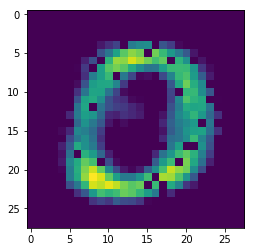

In [12]:
import matplotlib.pyplot as plt
import numpy as np

pixels = np.array(a, dtype='uint8')
index =10
plt.imshow(a[index,:,:])

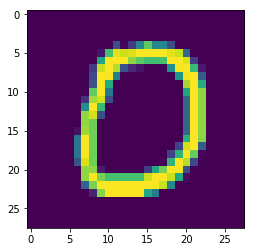

In [10]:
index = 10

plt.imshow(X_test[index,:,:])

In [11]:
hidden

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 10) dtype=float32>